In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df =pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.shape

(150, 5)

In [3]:
df=df.drop(columns=['Id'])
# deleting id column because it may interfere in the accuracy

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

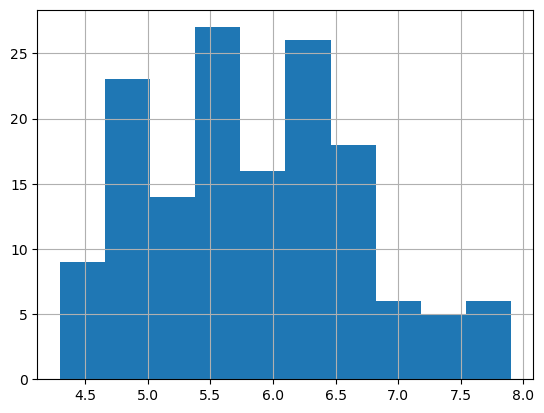

In [8]:
df['SepalLengthCm'].hist()

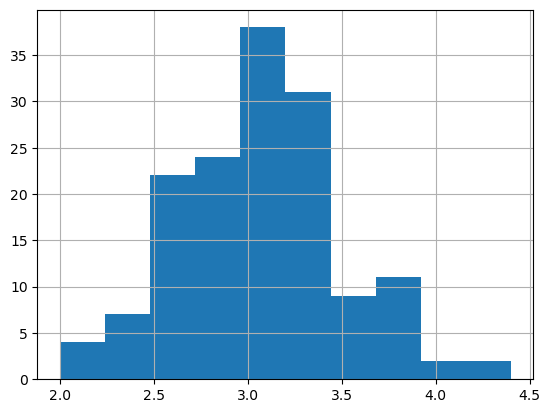

In [9]:
df['SepalWidthCm'].hist()

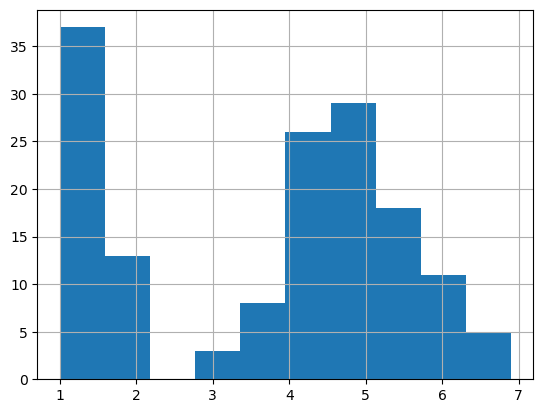

In [10]:
df['PetalLengthCm'].hist()

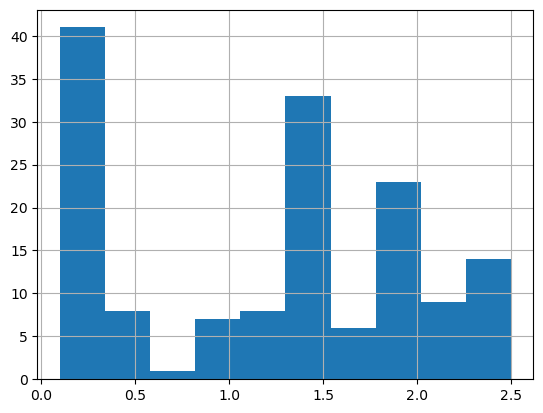

In [11]:
df['PetalWidthCm'].hist()

In [12]:
colors=['red','orange','blue']
species=['virginica','versicolor','setosa']

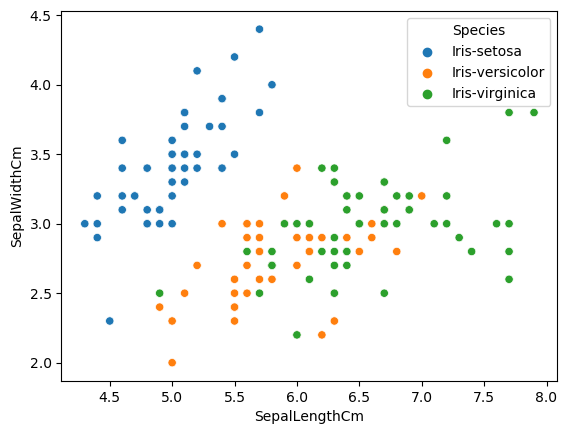

In [13]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df)

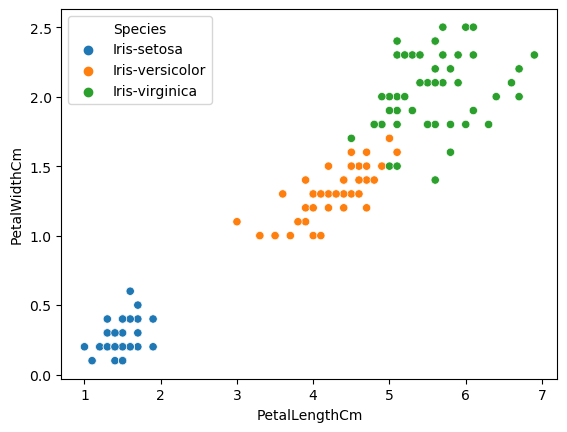

In [14]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species')

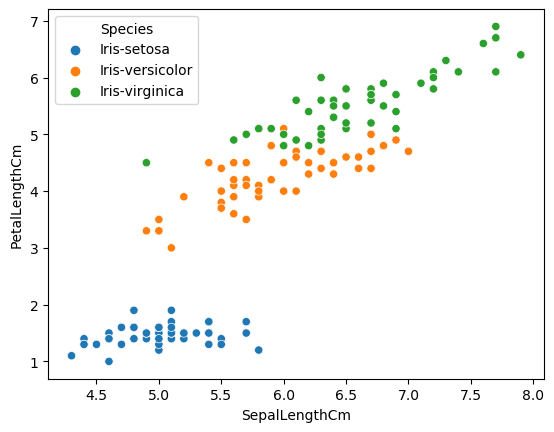

In [15]:
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df,hue='Species')

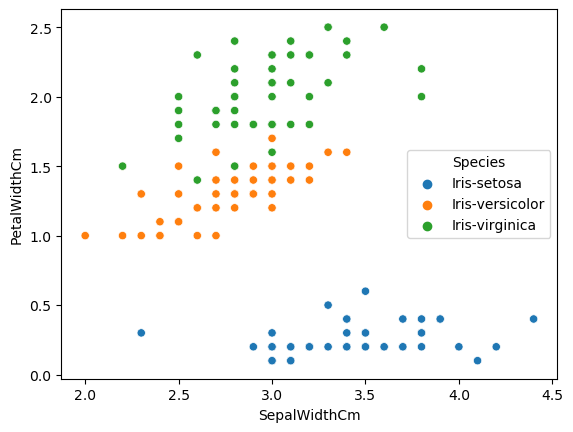

In [16]:
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',hue='Species',data=df)

In [17]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


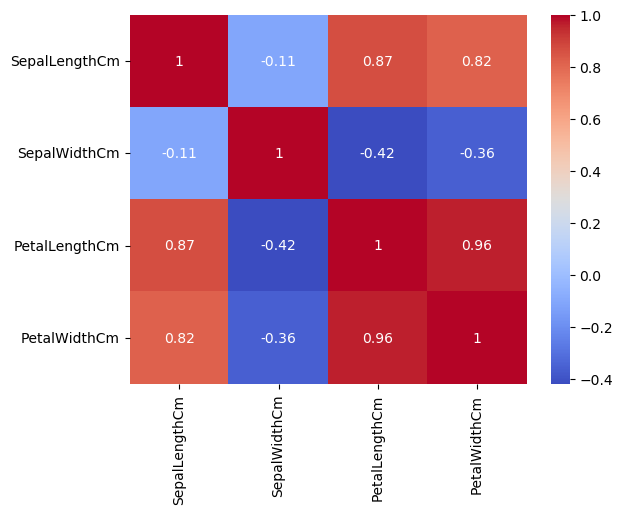

In [18]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

X=df.drop(columns=['Species'])
y=df['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [20]:
model=LogisticRegression()
model.fit(X_train,y_train)
print("Logistic Regression Accuracy:",model.score(X_test,y_test)*100)

Logistic Regression Accuracy: 95.55555555555556


In [21]:
model.fit(X_train.values,y_train.values)

LogisticRegression()

In [22]:
print("Accuracy:",model.score(X_test,y_test)*100)

Accuracy: 95.55555555555556


C:\Users\hp\anaconda3\envs\ml_python2023\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [23]:
model=KNeighborsClassifier()
model.fit(X_train.values,y_train.values)
print("accuracy:",model.score(X_test,y_test)*100)

accuracy: 95.55555555555556


C:\Users\hp\anaconda3\envs\ml_python2023\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [24]:
moel=DecisionTreeClassifier()
model.fit(X_train.values,y_train.values)
print("Accuracy:",model.score(X_test,y_test)*100)

Accuracy: 95.55555555555556


C:\Users\hp\anaconda3\envs\ml_python2023\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [25]:
import pickle
filename='saved_model.sav'
pickle.dump(model,open(filename,'wb'))

In [26]:
import pickle

In [27]:
filename='saved_model.sav'
try:
    with open(filename,'wb') as file:
        pickle.dump(model,file)
    print("model saved successfully.")
except Exception as e:
    print("error saving the model:{e}")
    

model saved successfully.


In [28]:
load_model=pickle.load(open(filename,'rb'))
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [29]:
import sklearn
print(sklearn.__version__)

1.0.2


In [30]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
24,4.8,3.4,1.9,0.2
118,7.7,2.6,6.9,2.3
103,6.3,2.9,5.6,1.8
12,4.8,3.0,1.4,0.1
63,6.1,2.9,4.7,1.4


In [31]:
load_model.predict([[4,3,1,5]])

array(['Iris-setosa'], dtype=object)